<a href="https://colab.research.google.com/github/Guillermina0406/Machine-Learning/blob/main/Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

En esta notebook, vamos a trabajar con el método K-means.<br/>

Para empezar, vamos a generarnos una serie de datasets sintéticos con las funciones que ya vienen incorporadas en scikit-learn. Notemos que estos datos vienen con un label asociado donde nos indica a que cluster pertenecen.<br/>

Vamos a trabajar con datos sintéticos para poder focalizarnos en como funciona el algoritmo, en lugar de entender las características asociadas a los datos. En un proyecto real, deberíamos explorar los datos y realizar el análisis exploratorio y transformacion de variables que ya realizamos. <br/>

¿Por qué es importante hacer una exploración de las variables y obtener estadística descriptiva? <br/>

Para poder aplicar K-means asumes que:<br/>
__Forma de los clusters:__ La varianza de la distribución es esferica. Lo que significa que los clusters tienen una forma esferica. Lo que significa que si las variables tienen varianzas similares y siguen una distribución normal, es más factible que este supuesto se cumpla.<br/>
__Tamaño de los clusters:__ Todos los clusters deben tener el mismo número o muy similar de observaciones.<br/>
__Relación entre las variables:__ Existe poca o ninguna correlación entre las variables.


In [ ]:
from sklearn.datasets import make_blobs, make_moons

#### Primer Dataset

In [ ]:
X1, y1= make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)

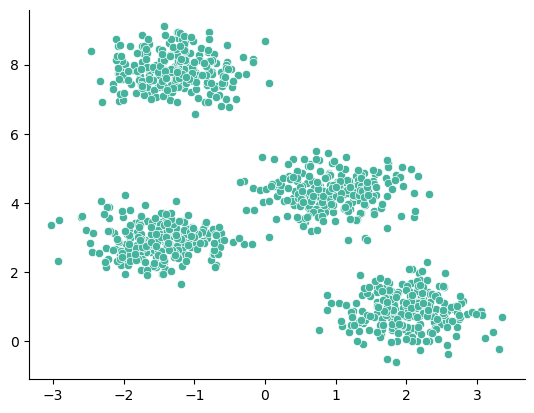

In [ ]:
sns.scatterplot(x=X1[:,0], y=X1[:,1], color='#45B39D')
sns.despine()
plt.show()

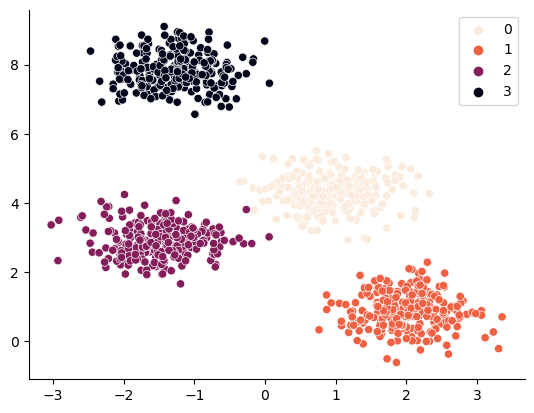

In [ ]:
sns.scatterplot(x=X1[:,0], y=X1[:,1], hue=y1, palette='rocket_r')
sns.despine()
plt.show()

#### Segundo Dataset

In [ ]:
X3, y3=make_moons(n_samples=1000, noise=.05, random_state=0)

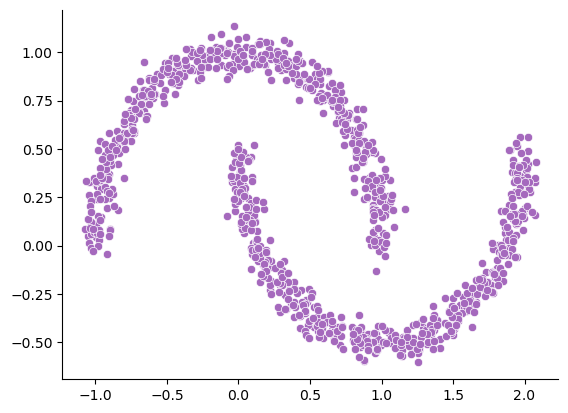

In [ ]:
sns.scatterplot(x=X3[:,0], y=X3[:,1], color='#A569BD')
sns.despine()
plt.show()

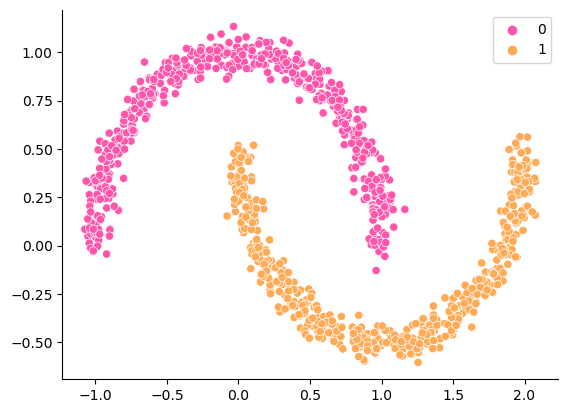

In [ ]:
sns.scatterplot(x=X3[:,0], y=X3[:,1], hue=y3, palette='spring')
sns.despine()
plt.show()

La idea ahora es utilizar el método de k-means para poder identificar los clusters sin conocer esta etiqueta.<br/>

Como es posible predecible, scikit-learn tiene una implementación para k-means.

In [ ]:
#Importemos la librería
from sklearn.cluster import KMeans

In [ ]:
# Especificamos el número adecuado de clusters en cada caso
first_kmeans=KMeans(n_clusters=4, random_state=0, n_init='auto')
thr_kmeans=KMeans(n_clusters=2, random_state=0, n_init='auto')

Entrenamos los modelos con los datos sin pasarles las etiquetas.

In [ ]:
first_kmeans.fit(X1);
thr_kmeans.fit(X3);

Luego de entrenar los modelos, podemos consultar el lugar de los centroides y la cantidad de puntos asignados a cada cluster.

In [ ]:
first_centroids=first_kmeans.cluster_centers_
print(first_centroids)

[[-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [-1.49807428  2.90164881]
 [ 0.92917513  4.29023124]]


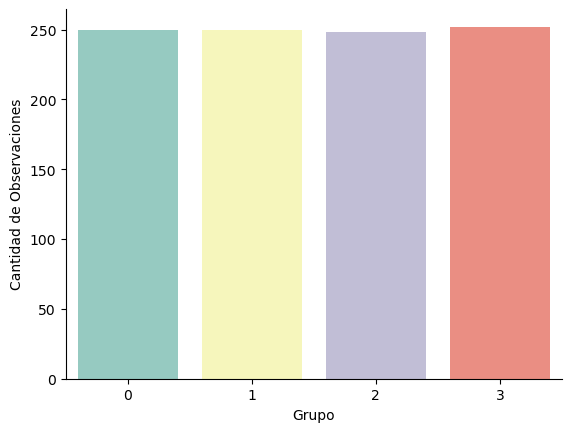

In [ ]:
y_means=first_kmeans.fit_predict(X1)
sns.countplot(x=y_means, palette='Set3')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

In [ ]:
third_centroids=thr_kmeans.cluster_centers_
print(third_centroids)

[[ 1.21499769 -0.08244338]
 [-0.18851291  0.5694509 ]]


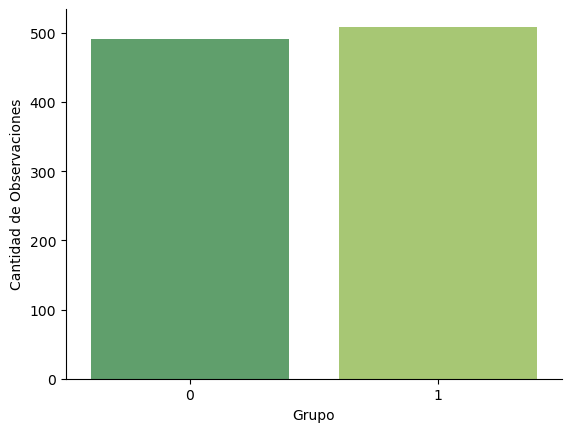

In [ ]:
y_means=thr_kmeans.fit_predict(X3)
sns.countplot(x=y_means, palette='summer')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

También podemos plotear los centros y las etiquetas en un gráfico.

In [ ]:
etiquetas_1=first_kmeans.labels_
etiquetas_3=thr_kmeans.labels_

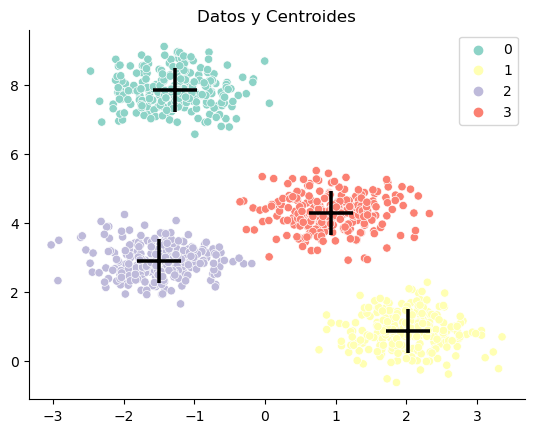

In [ ]:
# Graficamos los datos y centroides en 2D
sns.scatterplot(x=X1[:,0], y=X1[:,-1], hue=etiquetas_1, palette='Set3')
sns.scatterplot(x=first_centroids[:,0], y=first_centroids[:,1],color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

In [ ]:
# Graficamos los datos y centroides en 2D
sns.scatterplot(x=X3[:,0], y=X3[:,-1], hue=etiquetas_3, palette='Set2')
sns.scatterplot(x=third_centroids[:,0], y=third_centroids[:,1],color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

Uno de los pasos para realizar el clustering es determinar cuál es el número óptimo de clusters. Vimos dos métodos para realizar esto. Vamos a analizarlos.

__• Método Elbow:__ within-cluster variation vs. K

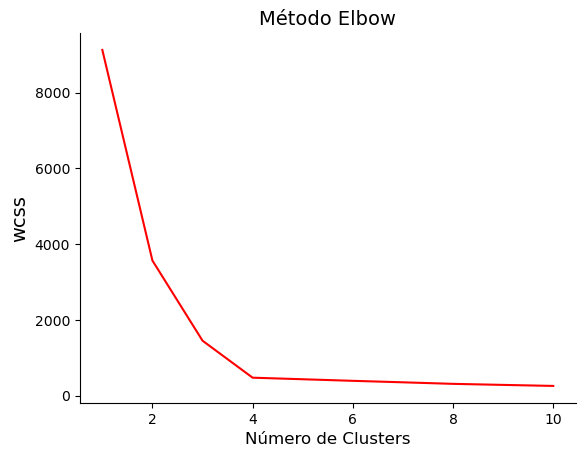

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X1)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="red")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Método Elbow', size=14)
plt.xlabel('Número de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

__• Método Silhouette:__ Distancia a puntos del mismo cluster vs. puntos de distinto cluster.

In [ ]:
from sklearn.metrics import silhouette_score

sil=[]
kmax=10

#dissimilarity would not be defined for a single cluster, thus, minimum number or clusters should be
for k in range(2, kmax+1):
    kmeans=KMeans(n_clusters=k, n_init='auto').fit(X1)
    labels=kmeans.labels_
    sil.append(silhouette_score(X1, labels, metric='euclidean'))

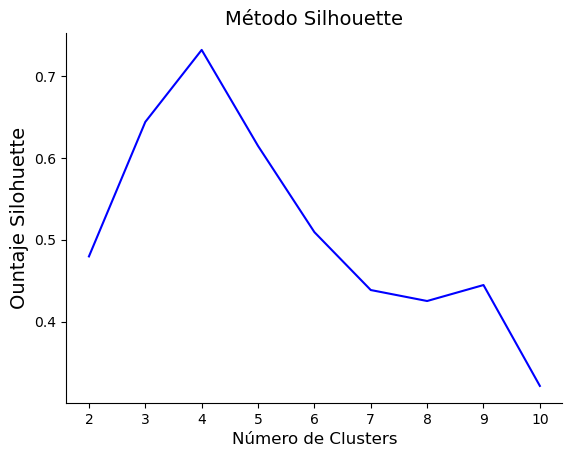

In [ ]:
plt.plot(range(2,11), sil, c='blue')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Método Silhouette', size=14)
plt.xlabel('Número de Clusters', size=12)
plt.ylabel('Ountaje Silohuette', size=14)
plt.show()